In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve


from imblearn.over_sampling import SMOTE

In [2]:
# Import the dataset
data = pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
'''  
DATA INFO
'''

'  \nDATA INFO\n'

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
print("duplicates in the dataset:" , data.duplicated().sum())

duplicates in the dataset: 0


In [6]:
print("Number of rows in dataset:", data.shape[0])
print("Number of columns in dataset:", data.shape[1])

Number of rows in dataset: 10000
Number of columns in dataset: 14


In [7]:
# Drop the columns that are not useful or include personal information
data = data.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

print("Null values in the dataset:")
data.isnull().sum()

Null values in the dataset:


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
train, test = train_test_split(data, test_size=0.2, random_state=0)

In [9]:
'''
Exploratory Data Analysis
'''

'\nExploratory Data Analysis\n'

C:\Users\rated\AppData\Local\Temp\ipykernel_12356\3452725623.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Exited", data=train, palette=["#ff9999", "#66b3ff"])


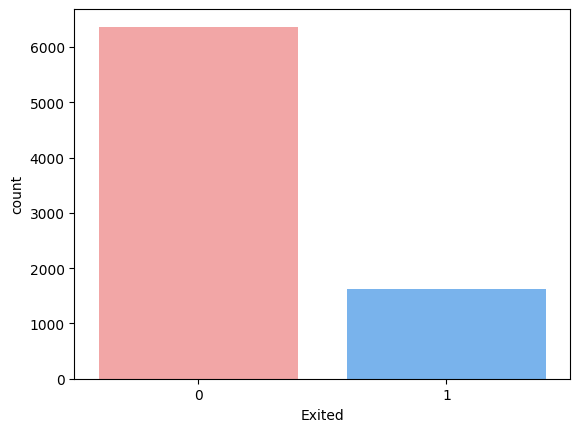

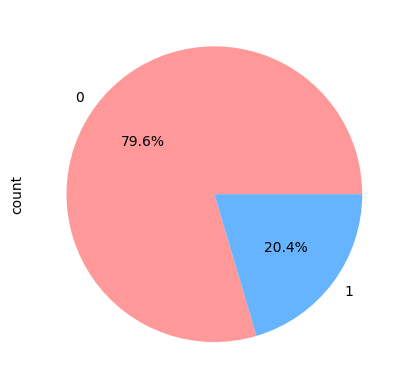

In [10]:
# lets take a look at the distribution of the target variable
sns.countplot(x="Exited", data=train, palette=["#ff9999", "#66b3ff"])
plt.show()

# pie chart (pallette is the color of the chart)
train["Exited"].value_counts().plot.pie(autopct="%1.1f%%", colors=["#ff9999", "#66b3ff"])
plt.show()

In [11]:
'''
This is a class imbalance problem.
We can see that only ~20% of the customers have exited the bank.

Let's try undersampling or oversampling to balance the classes later.
'''

"\nThis is a class imbalance problem.\nWe can see that only ~20% of the customers have exited the bank.\n\nLet's try undersampling or oversampling to balance the classes later.\n"

In [12]:
train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7389,667,Spain,Female,34,5,0.00,2,1,0,163830.64,0
9275,427,Germany,Male,42,1,75681.52,1,1,1,57098.00,0
2995,535,France,Female,29,2,112367.34,1,1,0,185630.76,0
5316,654,Spain,Male,40,5,105683.63,1,1,0,173617.09,0
356,850,Spain,Female,57,8,126776.30,2,1,1,132298.49,0


In [13]:
# find categorical columns
categorical_columns = [col for col in train.columns if train[col].dtype == "object"]

# find numerical columns
numerical_columns = [col for col in train.columns if train[col].dtype != "object"]

print('categorical columns:', categorical_columns)
print('numerical columns:', numerical_columns)

categorical columns: ['Geography', 'Gender']
numerical columns: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [14]:
''' 
Catetorical columns:
'''

' \nCatetorical columns:\n'

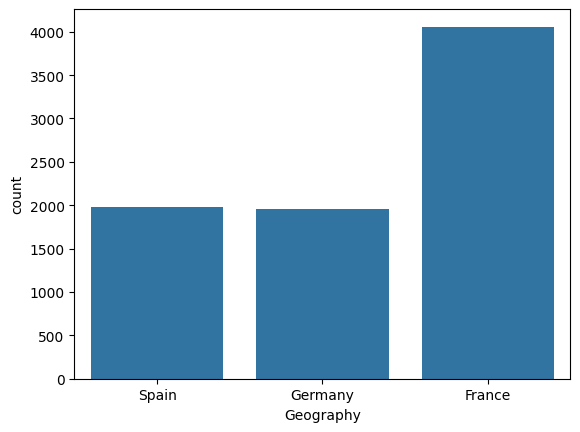

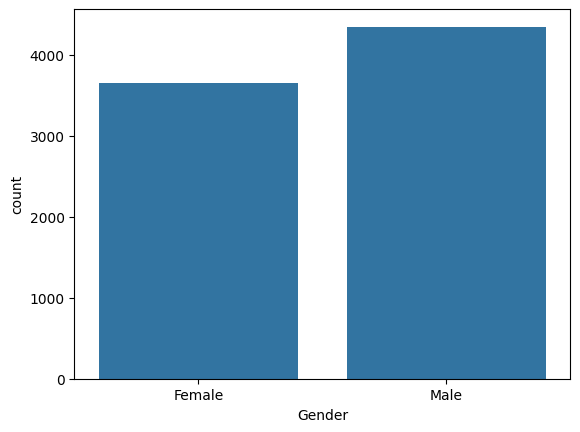

In [15]:
# plots for categorical columns
for col in categorical_columns:
    sns.countplot(x=col, data=train)
    plt.show()


In [16]:
# find the proportion of the categorical columns
for col in categorical_columns:
    print(train[col].value_counts() / train[col].value_counts().sum())

Geography
France     0.507250
Spain      0.247625
Germany    0.245125
Name: count, dtype: float64
Gender
Male      0.54375
Female    0.45625
Name: count, dtype: float64


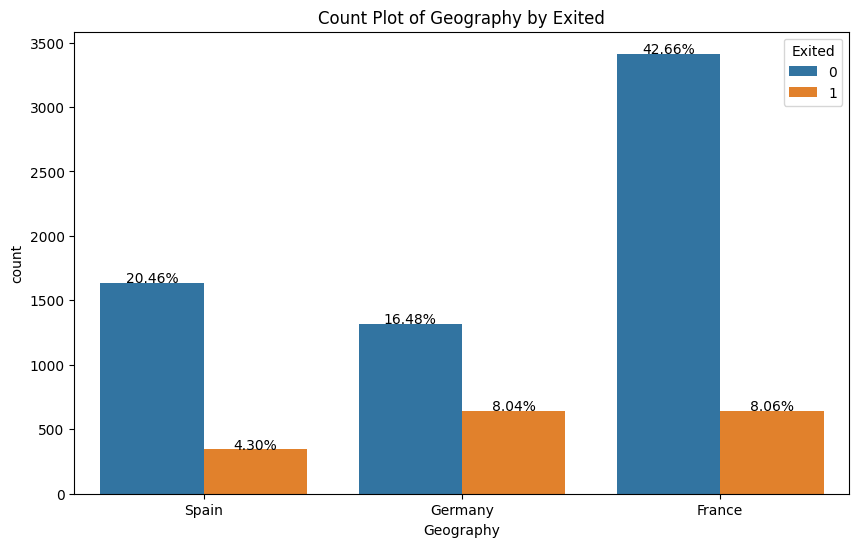

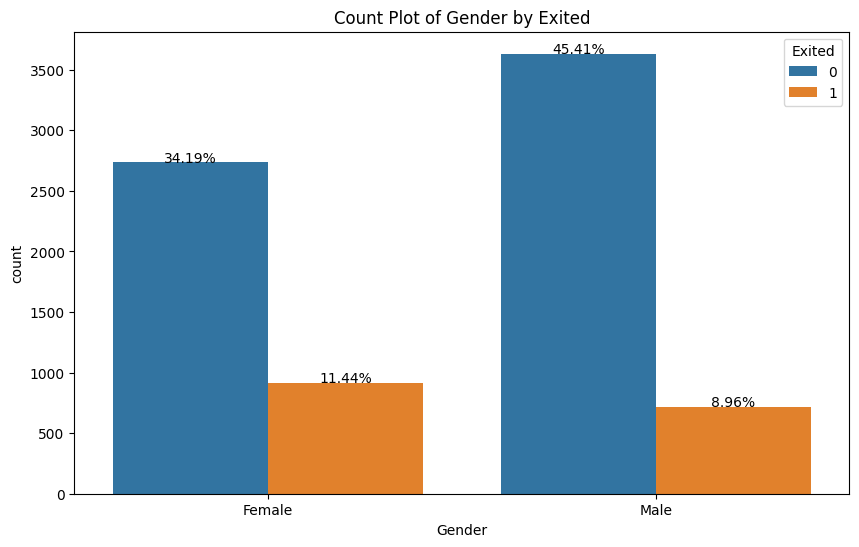

In [17]:
# lets plot these categorical columns with respect to the target column
# label each bar with the percentage of the respective category


# Assuming 'train' is your DataFrame and 'categorical_columns' is a list of column names
for col in categorical_columns:
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    sns.countplot(x=col, hue="Exited", data=train)
    plt.title(f'Count Plot of {col} by Exited')  # Adding a title for clarity
    # Iterate over the patches to get the height and add annotations
    for p in plt.gca().patches:
        height = p.get_height() or 0  
        if height > 0:  
            plt.gca().text(p.get_x() + p.get_width() / 2, height + 3, f"{height / len(train) * 100:.2f}%", ha="center")
    plt.show()



In [18]:
'''
The proportion of the target column is not the same for all the 
categories in the categorical columns.

For instance, ~1/3 of the female customers have exited the bank 
while ~1/5 of the male customers have exited the bank.

We can also see that France has the best retention rate among the countries.

We can work to decrease the churn rate based on these analyses.
'''

'\nThe proportion of the target column is not the same for all the \ncategories in the categorical columns.\n\nFor instance, ~1/3 of the female customers have exited the bank \nwhile ~1/5 of the male customers have exited the bank.\n\nWe can also see that France has the best retention rate among the countries.\n\nWe can work to decrease the churn rate based on these analyses.\n'

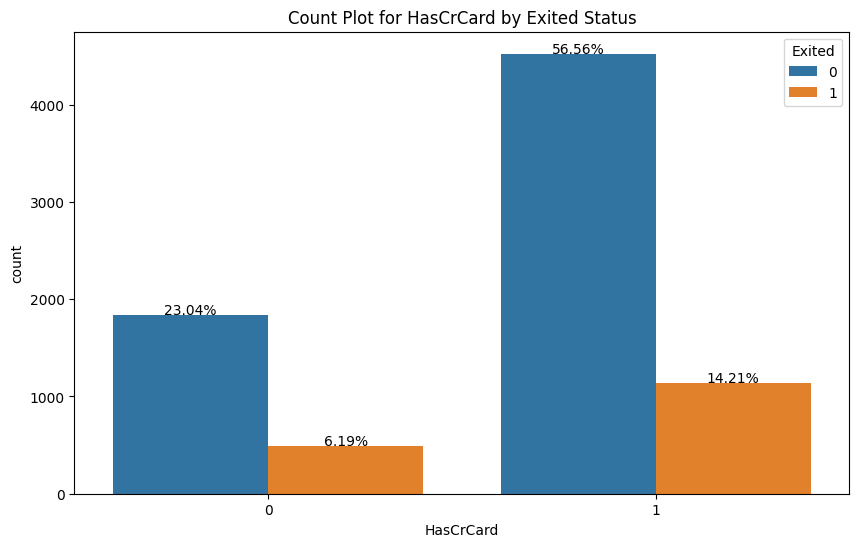

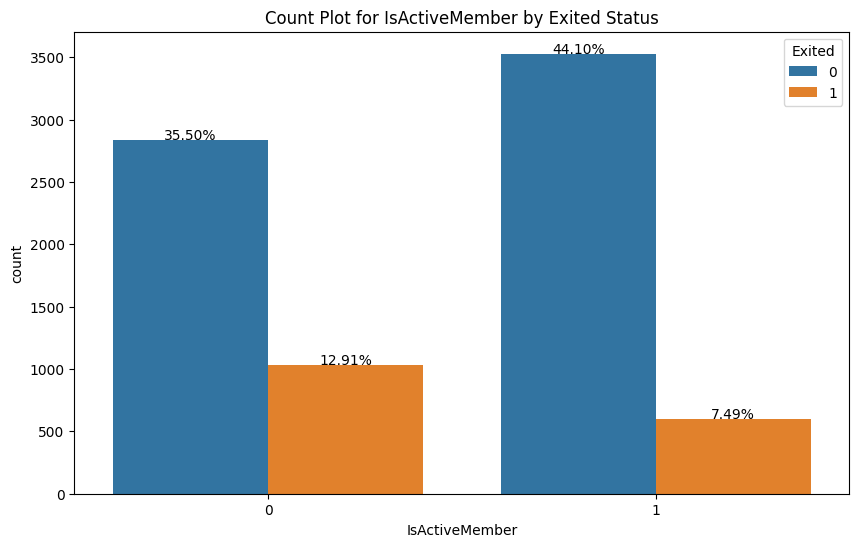

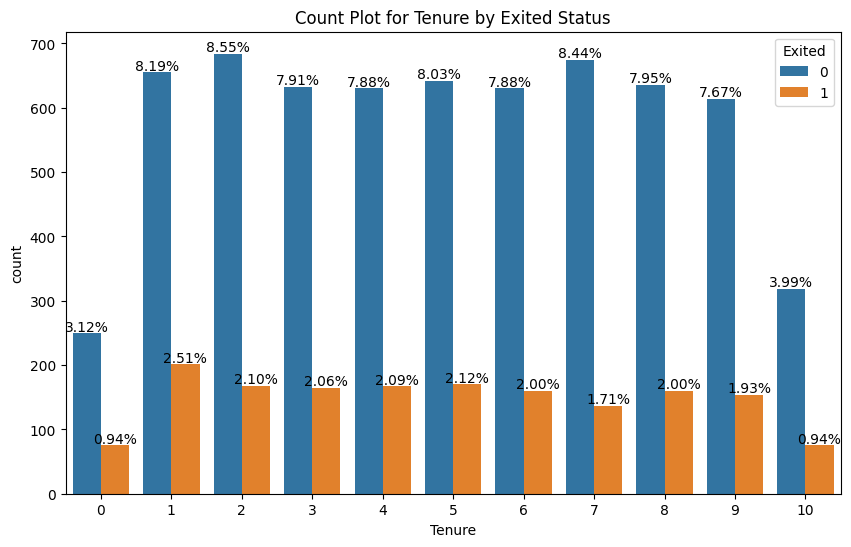

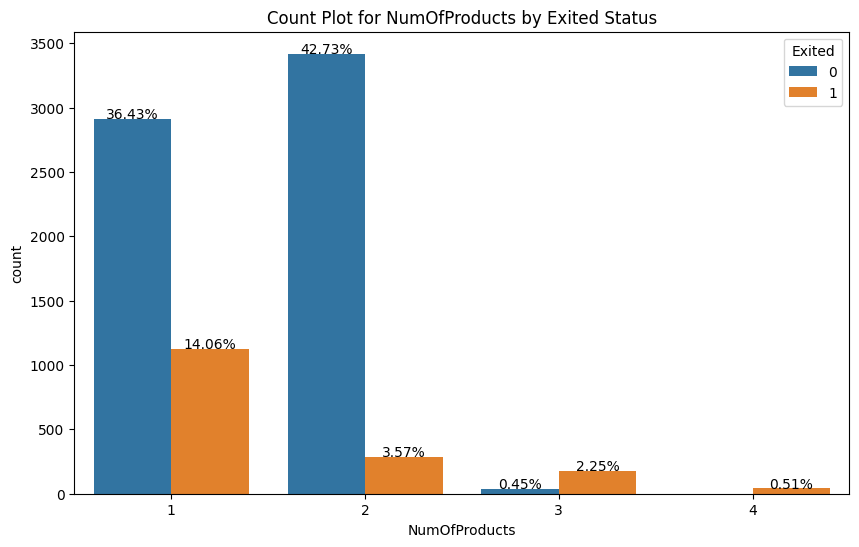

In [19]:
# Look at hasCrCard and IsActiveMember columns with respect to the target column

columns_of_interest = ["HasCrCard", "IsActiveMember", "Tenure", "NumOfProducts"]
for col in columns_of_interest:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue="Exited", data=train)
    plt.title(f'Count Plot for {col} by Exited Status')
    for p in plt.gca().patches:
        height = p.get_height() or 0  
        if height > 0:
            plt.gca().text(p.get_x() + p.get_width() / 2, height + 3, f"{height / len(train) * 100:.2f}%", ha="center")
    plt.show()

In [20]:
'''  
From the plots above, we can see that:

1. HasCrCard: the proportion is very similar for both classes. ~25% churn 
rate for both classes.

2. IsActiveMember: The churn rate is higher for inactive memebers. 

3. Tenure: approximately the same churn rate for all tenures.

4. NumOfProducts: The churn rate is the lowest for customers with 2 products.

With these insights, we have a better understanding of the data which will 
help reccomend strategies to reduce churn rate.
'''

'  \nFrom the plots above, we can see that:\n\n1. HasCrCard: the proportion is very similar for both classes. ~25% churn \nrate for both classes.\n\n2. IsActiveMember: The churn rate is higher for inactive memebers. \n\n3. Tenure: approximately the same churn rate for all tenures.\n\n4. NumOfProducts: The churn rate is the lowest for customers with 2 products.\n\nWith these insights, we have a better understanding of the data which will \nhelp reccomend strategies to reduce churn rate.\n'

In [21]:
'''  
Numerical columns:
'''

'  \nNumerical columns:\n'

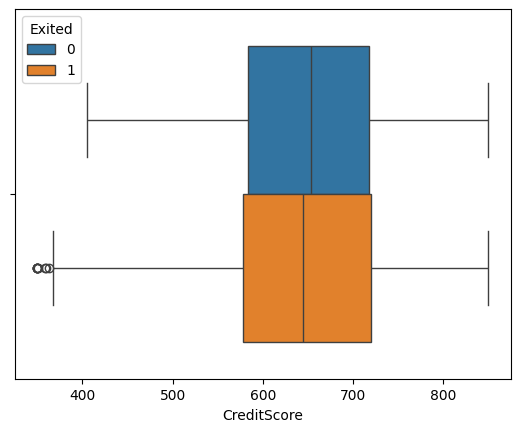

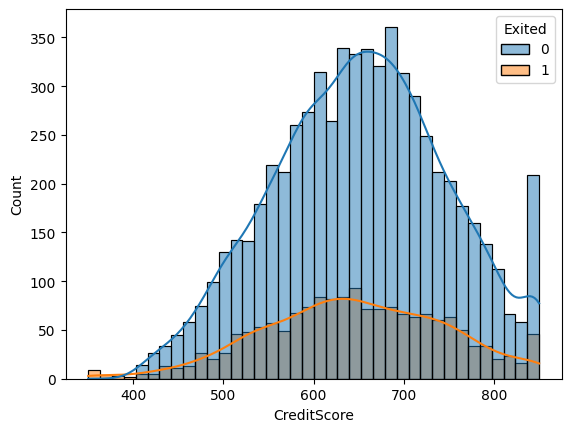

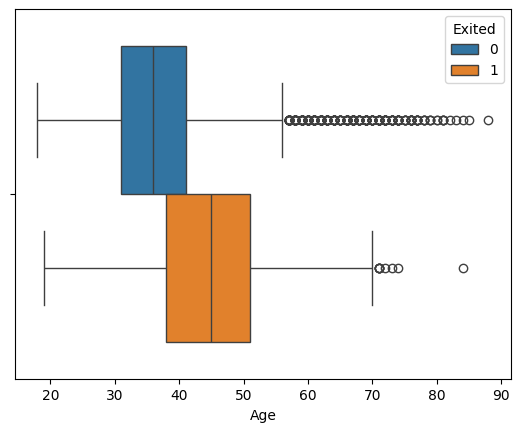

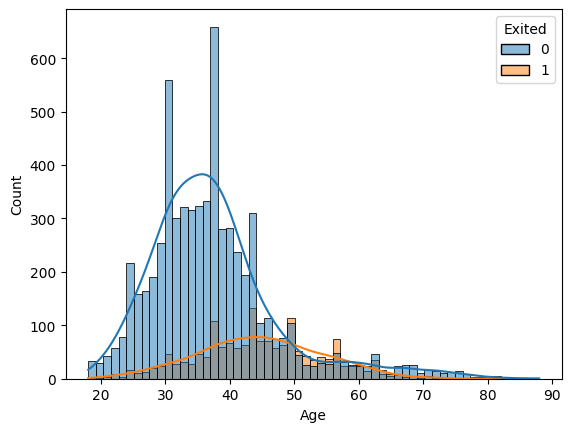

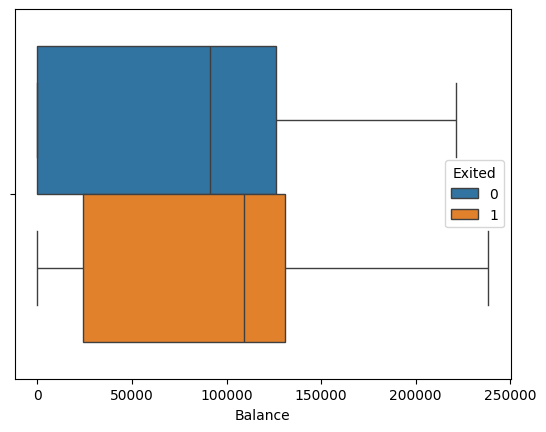

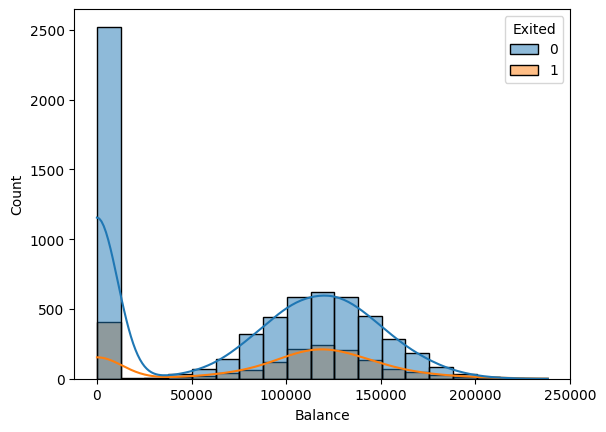

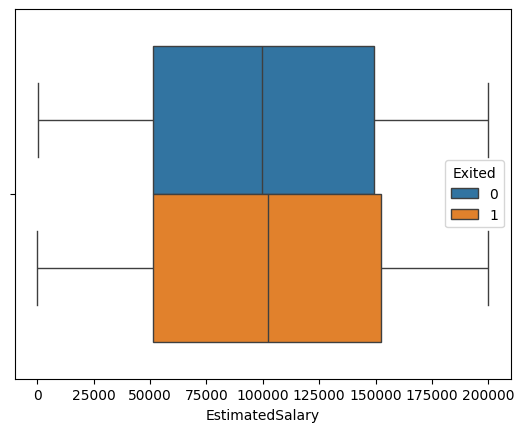

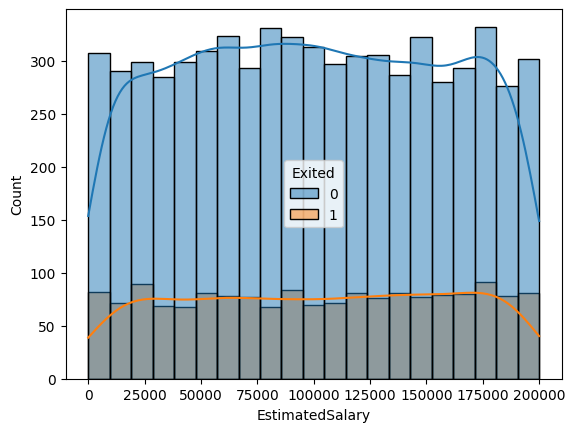

In [22]:
num_col = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

for col in num_col:
    sns.boxplot(x=col, data=train, hue="Exited")
    plt.show()
    sns.histplot(x=col, data=train, hue="Exited", kde=True)
    plt.show()


In [23]:
print("Number of 0 values in the Balance column:", (train["Balance"] == 0).sum())
print("Number of values other than 0 in the Balance column:", (train["Balance"] != 0).sum())


Number of 0 values in the Balance column: 2928
Number of values other than 0 in the Balance column: 5072


In [24]:
'''  
We can see that:

1. CreditScore: is approximately the same for both classes. 
(May have potential outliers)

2. Age: Right skewed distribution. 
(A log transformation may be useful to make it normally distributed)

3. Balance: there is a significant number of 0 values in the Balance column. 
(We can create a new feature to indicate if the customer has a balance or not.)

4. EstimatedSalary: is approximately the same for both classes.
'''

'  \nWe can see that:\n\n1. CreditScore: is approximately the same for both classes. \n(May have potential outliers)\n\n2. Age: Right skewed distribution. \n(A log transformation may be useful to make it normally distributed)\n\n3. Balance: there is a significant number of 0 values in the Balance column. \n(We can create a new feature to indicate if the customer has a balance or not.)\n\n4. EstimatedSalary: is approximately the same for both classes.\n'

In [25]:
'''  
Feature Engineering
'''

'  \nFeature Engineering\n'

In [26]:
# Create a new feature to indicate if the customer has a balance or not

train["HasBalance"] = train["Balance"].apply(lambda x: 1 if x > 0 else 0)
test["HasBalance"] = test["Balance"].apply(lambda x: 1 if x > 0 else 0)

# drop the Balance column
train = train.drop("Balance", axis=1)
test = test.drop("Balance", axis=1)

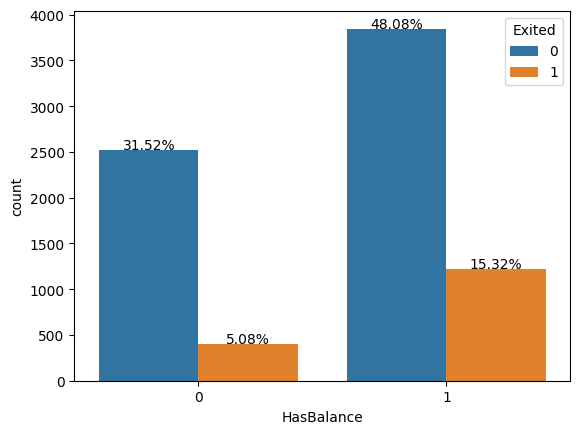

In [27]:
sns.countplot(x="HasBalance", hue="Exited", data=train)
for p in plt.gca().patches:
    height = p.get_height() or 0  
    if height > 0:
        plt.gca().text(p.get_x() + p.get_width() / 2, height + 3, f"{height / len(train) * 100:.2f}%", ha="center")
plt.show()

In [28]:
'''    
Data Preprocessing
'''

'    \nData Preprocessing\n'

In [29]:
# One hot encoding for the categorical columns
train = pd.get_dummies(train)
test = pd.get_dummies(test)

bool = ['Geography_Germany', 'Geography_Spain', 'Gender_Male', 'Geography_France', 'HasBalance', 'Gender_Female']
train[bool] = train[bool].astype(int)
test[bool] = test[bool].astype(int)

train.head()


,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,HasBalance,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7389,667,34,5,2,1,0,163830.64,0,0,0,0,1,1,0
9275,427,42,1,1,1,1,57098.00,0,1,0,1,0,0,1
2995,535,29,2,1,1,0,185630.76,0,1,1,0,0,1,0
5316,654,40,5,1,1,0,173617.09,0,1,0,0,1,0,1
356,850,57,8,2,1,1,132298.49,0,1,0,0,1,1,0


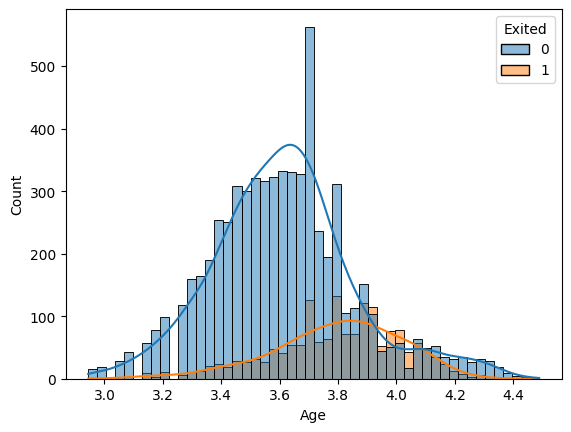

In [30]:
# Transformation of the Age column

train["Age"] = np.log1p(train["Age"])
test["Age"] = np.log1p(test["Age"])

sns.histplot(x="Age", data=train, hue="Exited", kde=True)
plt.show()


In [31]:
train.head()

,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,HasBalance,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7389,667,3.555348,5,2,1,0,163830.64,0,0,0,0,1,1,0
9275,427,3.761200,1,1,1,1,57098.00,0,1,0,1,0,0,1
2995,535,3.401197,2,1,1,0,185630.76,0,1,1,0,0,1,0
5316,654,3.713572,5,1,1,0,173617.09,0,1,0,0,1,0,1
356,850,4.060443,8,2,1,1,132298.49,0,1,0,0,1,1,0


In [32]:
scaler = StandardScaler()

num_col = ['CreditScore', 'Age', 'EstimatedSalary']

train[num_col] = scaler.fit_transform(train[num_col])
test[num_col] = scaler.transform(test[num_col])

train.head()

,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,HasBalance,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7389,0.169582,-0.389274,5,2,1,0,1.106432,0,0,0,0,1,1,0
9275,-2.304559,0.430233,1,1,1,1,-0.748664,0,1,0,1,0,0,1
2995,-1.191196,-1.002955,2,1,1,0,1.485335,0,1,1,0,0,1,0
5316,0.035566,0.240623,5,1,1,0,1.276528,0,1,0,0,1,0,1
356,2.056114,1.621533,8,2,1,1,0.558378,0,1,0,0,1,1,0


In [33]:
# Split the data

X_train = train.drop("Exited", axis=1)
y_train = train["Exited"]

X_test = test.drop("Exited", axis=1)
y_test = test["Exited"]

# view the shape of the data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8000, 13)
X_test shape: (2000, 13)
y_train shape: (8000,)
y_test shape: (2000,)


In [34]:
'''  
Lets try this before applying any sampling techniques.

Lets try a couple of models and see how they perform.
1. Decision Tree
2. Random Forest
3. Gradient Boosting

'''

'  \nLets try this before applying any sampling techniques.\n\nLets try a couple of models and see how they perform.\n1. Decision Tree\n2. Random Forest\n3. Gradient Boosting\n\n'

In [35]:
# Descision Tree
dt = DecisionTreeClassifier(random_state=0)

param_grid = {
    "max_depth": [3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_split": [2, 3, 4, 5, 6, 7, 8],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7, 8],
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_features": ["sqrt", "log2", None],
    "random_state": [0, 42]
}

dt_grid = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

dt_grid.fit(X_train, y_train)

print("Best parameters for Decision Tree:", dt_grid.best_params_)
print("Best score for Decision Tree:", dt_grid.best_score_)

Fitting 5 folds for each of 10752 candidates, totalling 53760 fits
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 8, 'random_state': 0, 'splitter': 'best'}
Best score for Decision Tree: 0.86


In [36]:
# Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 8, 'random_state': 0, 'splitter': 'best'}

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("Accuracy score for Decision Tree:", accuracy_score(y_test, y_pred))
print("Classification report for Decision Tree:")
print(classification_report(y_test, y_pred))

dt_hp = DecisionTreeClassifier(criterion="gini", max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=8, random_state=0, splitter="best")

dt_hp.fit(X_train, y_train)

y_pred = dt_hp.predict(X_test)

print("Accuracy score for Decision Tree:", accuracy_score(y_test, y_pred))
print("Classification report for Decision Tree:")   
print(classification_report(y_test, y_pred))


Accuracy score for Decision Tree: 0.795
Classification report for Decision Tree:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1595
           1       0.49      0.54      0.52       405

    accuracy                           0.80      2000
   macro avg       0.69      0.70      0.69      2000
weighted avg       0.80      0.80      0.80      2000

Accuracy score for Decision Tree: 0.8675
Classification report for Decision Tree:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.78      0.49      0.60       405

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



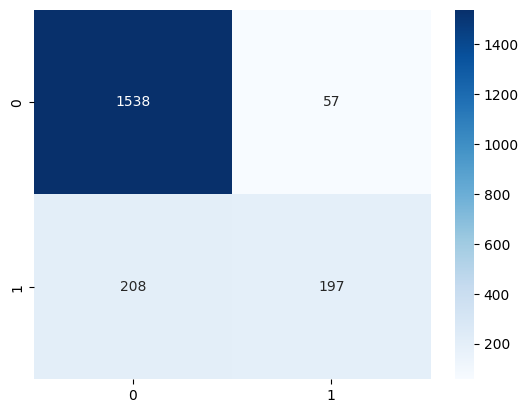

In [37]:
dt_cm = confusion_matrix(y_test, y_pred)

sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues")
plt.show()

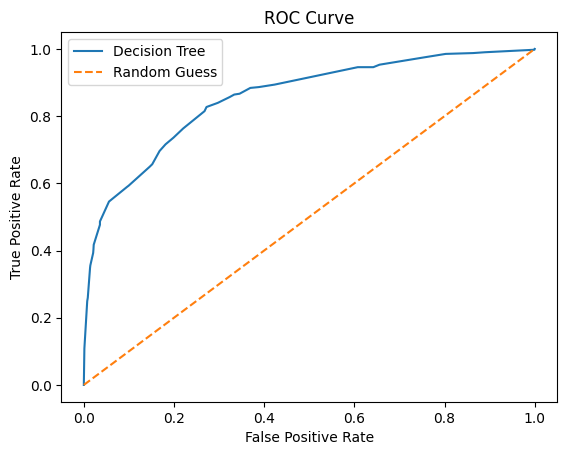

In [38]:
# ROC Curve
y_pred_proba = dt_hp.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="Decision Tree")
plt.plot([0,1], [0,1], "--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [39]:
# Random Forest

rf = RandomForestClassifier(random_state=0)

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

rf_grid.fit(X_train, y_train)

print("Best parameters for Random Forest:", rf_grid.best_params_)
print("Best score for Random Forest:", rf_grid.best_score_)


Fitting 5 folds for each of 2700 candidates, totalling 13500 fits


KeyboardInterrupt: 

In [40]:
# Best parameters for Random Forest: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

rf = RandomForestClassifier(bootstrap=True, criterion="gini", max_depth=10, max_features="sqrt", min_samples_leaf=2, min_samples_split=2, n_estimators=200, random_state=0)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy score for Random Forest:", accuracy_score(y_test, y_pred))
print("Classification report for Random Forest:")
print(classification_report(y_test, y_pred))

Accuracy score for Random Forest: 0.868
Classification report for Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1595
           1       0.79      0.47      0.59       405

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.85      2000



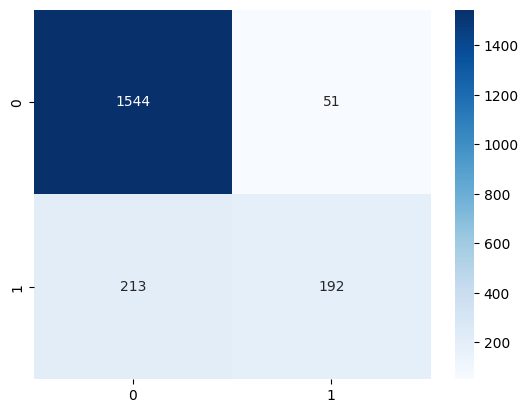

In [41]:
rf_cm = confusion_matrix(y_test, y_pred)

sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues")
plt.show()

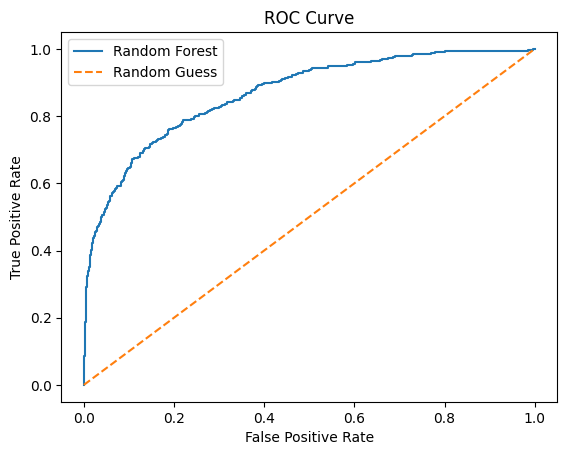

In [42]:
y_pred_prob = rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr, label="Random Forest")
plt.plot([0,1], [0,1], "--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [43]:
# Gradient Boosting

gb = GradientBoostingClassifier(random_state=0)

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', 'log2']
}

gb_grid = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

gb_grid.fit(X_train, y_train)

print("Best parameters for Gradient Boosting:", gb_grid.best_params_)
print("Best score for Gradient Boosting:", gb_grid.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 50, 'subsample': 1.0}
Best score for Gradient Boosting: 0.8618750000000001


In [44]:
y_pred = gb_grid.predict(X_test)

print("Accuracy score for Gradient Boosting:", accuracy_score(y_test, y_pred))
print("Classification report for Gradient Boosting:")

print(classification_report(y_test, y_pred))

Accuracy score for Gradient Boosting: 0.8655
Classification report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.75      0.51      0.60       405

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



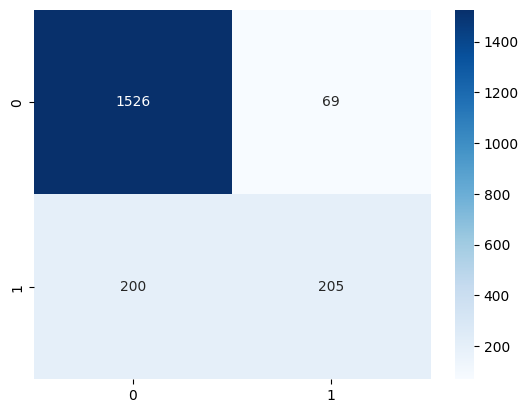

In [45]:
gb_cm = confusion_matrix(y_test, y_pred)

sns.heatmap(gb_cm, annot=True, fmt="d", cmap="Blues")
plt.show()


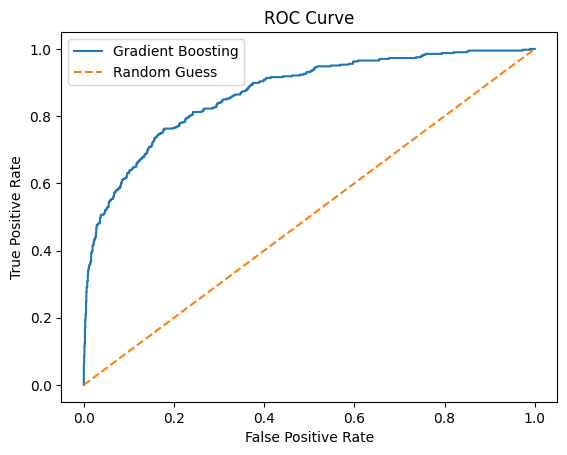

In [46]:
y_pred_prob = gb_grid.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr, label="Gradient Boosting")
plt.plot([0,1], [0,1], "--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [47]:
'''  
Out of the three models, the Random Forest performed the best.

Classification report for Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1595
           1       0.79      0.47      0.59       405

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.85      2000

The model was very good at predicting the customers who did not exit the bank
but not as good at predicting the customers who exited the bank.

This is most likely due to the class imbalance in the dataset.

Let's try to balance the classes using SMOTE and see if the model performance improves.
'''

"  \nOut of the three models, the Random Forest performed the best.\n\nClassification report for Random Forest:\n              precision    recall  f1-score   support\n\n           0       0.88      0.97      0.92      1595\n           1       0.79      0.47      0.59       405\n\n    accuracy                           0.87      2000\n   macro avg       0.83      0.72      0.76      2000\nweighted avg       0.86      0.87      0.85      2000\n\nThe model was very good at predicting the customers who did not exit the bank\nbut not as good at predicting the customers who exited the bank.\n\nThis is most likely due to the class imbalance in the dataset.\n\nLet's try to balance the classes using SMOTE and see if the model performance improves.\n"

In [65]:
# lets test for overfitting (random forest)
# cross validation and learning curve

rf = RandomForestClassifier(bootstrap=True, criterion="gini", max_depth=10, max_features="sqrt", min_samples_leaf=2, min_samples_split=2, n_estimators=200, random_state=0)

cv_score = cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1, scoring="accuracy")

print("Cross validation scores for Random Forest:", cv_score)
print("Mean cross validation score for Random Forest:", cv_score.mean())

Cross validation scores for Random Forest: [0.859375 0.870625 0.851875 0.8575   0.86125 ]
Mean cross validation score for Random Forest: 0.860125


In [ ]:
'''  
It looks like the model is not overfitting the training data.
'''

In [48]:
'''  
Feature Importance
'''

'  \nFeature Importance\n'

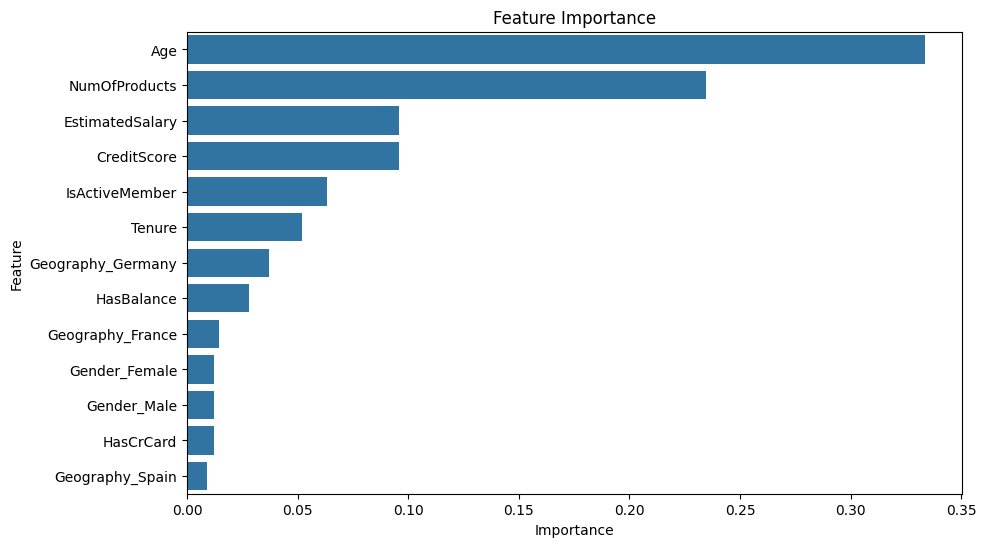

In [49]:
# lets look at the feature importance of the random forest model
feature_importance = rf.feature_importances_

feature_importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importance})

feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance")

plt.show()

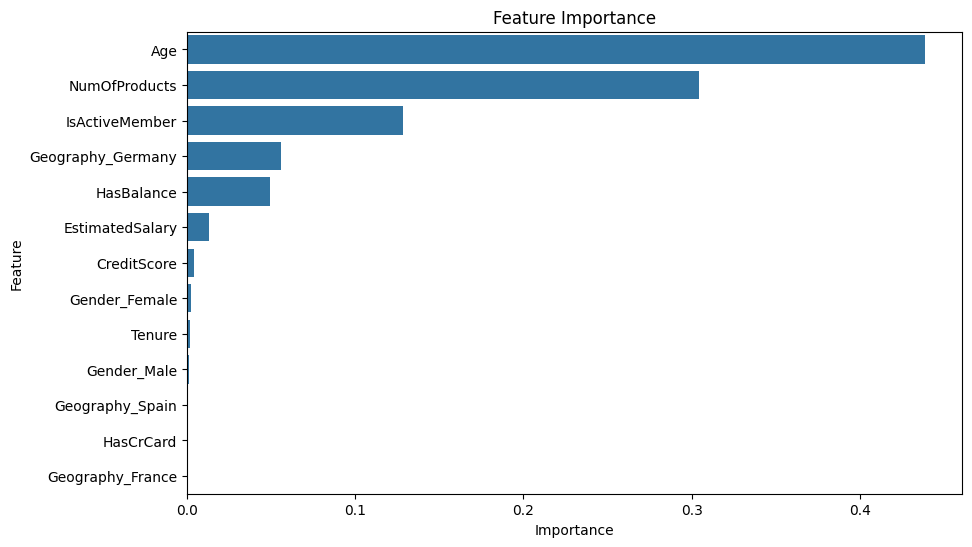

In [50]:
# lets look at the feature importance of the decision tree model
feature_importance = dt_hp.feature_importances_

feature_importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importance})

feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance")
plt.show()


In [51]:
'''  
From the feature importance plots, we can see that the Age and NumOfProducts 
are the top two important features in the Random Forest model and the Decision 
Tree model.

I wasn't expecting the random forest model to take EstimatedSalary as the third
most important feature (based on the analysis above). 

The decision tree model was what I was expecting.
'''

"  \nFrom the feature importance plots, we can see that the Age and NumOfProducts \nare the top two important features in the Random Forest model and the Decision \nTree model.\n\nI wasn't expecting the random forest model to take EstimatedSalary as the third\nmost important feature (based on the analysis above). \n\nThe decision tree model was what I was expecting.\n"

In [52]:
# Smote Sampling

smote = SMOTE(random_state=0)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# check the shape of the data after smote

print("X_train_smote shape:", X_train_smote.shape)
print("y_train_smote shape:", y_train_smote.shape)

X_train_smote shape: (12736, 13)
y_train_smote shape: (12736,)


In [53]:
# lets try the decision tree model with the smote data

dt = DecisionTreeClassifier(random_state=0)

param_grid = {
    "max_depth": [3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_split": [2, 3, 4, 5, 6, 7, 8],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7, 8],
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_features": ["sqrt", "log2", None],
    "random_state": [0, 42]
}

dt_grid = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

dt_grid.fit(X_train_smote, y_train_smote)

print("Best parameters for Decision Tree with SMOTE:", dt_grid.best_params_)
print("Best score for Decision Tree with SMOTE:", dt_grid.best_score_)


Fitting 5 folds for each of 10752 candidates, totalling 53760 fits
Best parameters for Decision Tree with SMOTE: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 0, 'splitter': 'best'}
Best score for Decision Tree with SMOTE: 0.8100709487382884


In [54]:
# Best parameters for Decision Tree with SMOTE: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0, 'splitter': 'best'}

dt_hp = DecisionTreeClassifier(criterion="gini", max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, random_state=0, splitter="best")

dt_hp.fit(X_train_smote, y_train_smote)

y_pred = dt_hp.predict(X_test)

print("Accuracy score for Decision Tree with SMOTE:", accuracy_score(y_test, y_pred))
print("Classification report for Decision Tree with SMOTE:")
print(classification_report(y_test, y_pred))

Accuracy score for Decision Tree with SMOTE: 0.755
Classification report for Decision Tree with SMOTE:
              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1595
           1       0.43      0.67      0.53       405

    accuracy                           0.76      2000
   macro avg       0.67      0.72      0.68      2000
weighted avg       0.81      0.76      0.77      2000



In [55]:
# Random Forest with SMOTE

rf = RandomForestClassifier(random_state=0)

rf.fit(X_train_smote, y_train_smote)

y_pred = rf.predict(X_test)

print("Accuracy score for Random Forest with SMOTE:", accuracy_score(y_test, y_pred))
print("Classification report for Random Forest with SMOTE:")
print(classification_report(y_test, y_pred))


Accuracy score for Random Forest with SMOTE: 0.823
Classification report for Random Forest with SMOTE:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1595
           1       0.55      0.65      0.60       405

    accuracy                           0.82      2000
   macro avg       0.73      0.76      0.74      2000
weighted avg       0.84      0.82      0.83      2000



In [56]:
# gradient boosting with SMOTE

gb = GradientBoostingClassifier(random_state=0)

gb.fit(X_train_smote, y_train_smote)

y_pred = gb.predict(X_test)

print("Accuracy score for Gradient Boosting with SMOTE:", accuracy_score(y_test, y_pred))
print("Classification report for Gradient Boosting with SMOTE:")
print(classification_report(y_test, y_pred))


Accuracy score for Gradient Boosting with SMOTE: 0.807
Classification report for Gradient Boosting with SMOTE:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1595
           1       0.52      0.74      0.61       405

    accuracy                           0.81      2000
   macro avg       0.72      0.78      0.74      2000
weighted avg       0.84      0.81      0.82      2000



In [57]:
'''   
None of the models performed better with SMOTE.

The best model is the random forest model with hyperparameter tuning and 
without any sampling techniques.
'''

'   \nNone of the models performed better with SMOTE.\n\nThe best model is the random forest model with hyperparameter tuning and \nwithout any sampling techniques.\n'

In [58]:
'''  
We can see that we correctly identified the features that did not have much meaning
- CreditScore, Tenure, HasCrCard.

The most impotant features are: 
1. Age
2. NumOfProducts
3. IsActiveMember
4. Geography_Germany


Interesting enough, gender does not seem to have much importance in the model.
But the plot from ealier showed that female customers have a higher churn

Reccomendation for the bank:
1. Focus on the Age of the customers
-- This could mean create more products or incentives that cater to the older age group.

2. Focus on the number of products the customer has
-- Customers with 2 products have the lowest churn rate. 
-- The bank could create a strategy to increase the number of products the customers have to 2.
-- The bank can make it so you have to have 2 products to get a discount or a special offer.

3. Focus on the active members
-- Inactive members have a higher churn rate.
-- The bank could create a strategy to keep the customers active.
-- This could be through a loyalty program or a special offer for active members.

4. Focus on the customers in Germany
-- Customers in France have the lowest churn rate.
-- The bank could analyze why France has the lowest churn rate and try to implement the same in other countries.
'''

'  \nWe can see that we correctly identified the features that did not have much meaning\n- CreditScore, Tenure, HasCrCard.\n\nThe most impotant features are: \n1. Age\n2. NumOfProducts\n3. IsActiveMember\n4. Geography_Germany\n\n\nInteresting enough, gender does not seem to have much importance in the model.\nBut the plot from ealier showed that female customers have a higher churn\n\nReccomendation for the bank:\n1. Focus on the Age of the customers\n-- This could mean create more products or incentives that cater to the older age group.\n\n2. Focus on the number of products the customer has\n-- Customers with 2 products have the lowest churn rate. \n-- The bank could create a strategy to increase the number of products the customers have to 2.\n-- The bank can make it so you have to have 2 products to get a discount or a special offer.\n\n3. Focus on the active members\n-- Inactive members have a higher churn rate.\n-- The bank could create a strategy to keep the customers active.\n

In [59]:
'''  
Conclusion

In this project, we analyzed the bank's customer data to predict the customers who are likely to exit the bank.

We used three models: Decision Tree, Random Forest, and Gradient Boosting to predict the customers who are likely to exit the bank.

We found that the Random Forest model performed the best with an accuracy of 87%.

This model can help the bank identify the customers who are likely to exit the bank and take action to reduce the churn rate.

In the future, I would like to try more class weighting techniques to see if the model performance improves.

I would also like to try more feature engineering techniques to see if the model performance improves.
'''

"  \nConclusion\n\nIn this project, we analyzed the bank's customer data to predict the customers who are likely to exit the bank.\n\nWe used three models: Decision Tree, Random Forest, and Gradient Boosting to predict the customers who are likely to exit the bank.\n\nWe found that the Random Forest model performed the best with an accuracy of 87%.\n\nThis model can help the bank identify the customers who are likely to exit the bank and take action to reduce the churn rate.\n\nIn the future, I would like to try more class weighting techniques to see if the model performance improves.\n\nI would also like to try more feature engineering techniques to see if the model performance improves.\n"